# Data Parsing and Visualisation 
--- 
This notebook demonstrates how we conduct data parsing and some simple EDA to visualise and analyse the data. 

## Part 1: Data Parsing 
The following is what we have done (in order): 
1. Read in data info csv as info, unzip dataset0.json.gz and read in the json data. 
2. Calculate the mean, median, std, min, max for the length, std and mean of the signal at each of the 3 positions (1-,central, 1+) and save the results into result_df. We have then generated 45 numerical features from our dataset0. 
3. Merged result_df with the label data. The final merged_data df have 121838 rows and 50 columns. 

In [1]:
import json
import pandas as pd

Please modify the datapath based on your local directory 

In [2]:
!gzip -d data/dataset0.json.gz

'gzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
info = pd.read_csv("data/data.info")

Before you run the following code, run !gzip -d dataset0.json.gz in the terminal to unzip the data file 

In [4]:
data_list = []

with open('data/dataset0.json', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        data_list.append(data)


In [5]:
def explore_dataset(data_list):
    a_results = []
    i = 0
    for data in data_list:
        trans_id, first = next(iter(data.items()))
        position, second = next(iter(first.items()))
        sequence, data = next(iter(second.items()))
        fixed_features = [trans_id, position, sequence]
        for obs in data:
            a_results.append(fixed_features + obs)
        if (i % 10000 == 0):
            print(i)
        i += 1
    print("done")
    return a_results

results = explore_dataset(data_list)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
done


In [6]:
result_df = pd.DataFrame(results)

In [7]:
colnames = ['transcript_id', 'transcript_position', 'sequence']
for i in ['-1_flank', 'central', '+1_flank']:
    for j in ["length", "std", "mean"]:
        colnames.append(i + '_' + j)
print(colnames)
result_df.columns = colnames

['transcript_id', 'transcript_position', 'sequence', '-1_flank_length', '-1_flank_std', '-1_flank_mean', 'central_length', 'central_std', 'central_mean', '+1_flank_length', '+1_flank_std', '+1_flank_mean']


In [8]:
result_df.shape

(11027106, 12)

In [9]:
result_df['transcript_position'] = result_df['transcript_position'].astype(int)

In [10]:
result_df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [11]:
info.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


In [12]:
merged_data = pd.merge(result_df, info, on=['transcript_id', 'transcript_position'], how='inner')

In [13]:
merged_data.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [15]:
merged_data.shape

(11027106, 14)

<Axes: xlabel='label'>

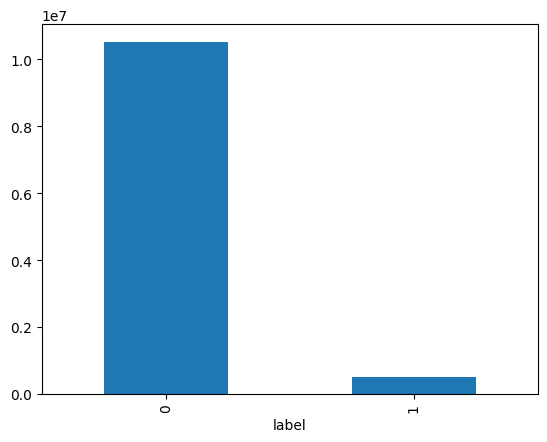

In [16]:
# View distribution of labels 
merged_data['label'].value_counts().plot(kind='bar')

In [14]:
file_path = "data/merged_data.csv"

merged_data.to_csv(file_path, index=False)

The data is highly imbalanced. given the large size of the data, we may consider to perform undersampling to truncate the label 0 to handle the imbalanced dataset. 